In [7]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
from iqradre.prod.idcard import IDCardPredictor
import matplotlib.pyplot as plt

import pandas as pd
pd.set_option("max_rows", None)
import imutils

In [110]:
%%time
config = {
    'segmentor': f'../weights/segment/unet_sfeat32_v5.pth',
    'detector': f'../weights/detect/craft_ktp_ohem.pth.tar',
    'recognitor': f'../weights/recog/ocrnet_pretrained_ktp_v3.pth',
    'extractor': f'../weights/extract/layoutlm_v2_ktp_20kv1_vacc_0.981_vloss_0.26.pth',
    'tokenizer': "indobenchmark/indobert-base-p2"   
}

idcard = IDCardPredictor(config, device='cpu')

INFO: Load all model, please wait...


Some weights of the model checkpoint at microsoft/layoutlm-base-uncased were not used when initializing LayoutLMForTokenClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.decoder.bias']
- This IS expected if you are initializing LayoutLMForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing LayoutLMForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of LayoutLMForTokenClassification were not initialized from the model checkpoint at microsoft

INFO: All model has been loaded!
CPU times: user 4.79 s, sys: 389 ms, total: 5.18 s
Wall time: 9.47 s


(818, 730)
CPU times: user 27.1 s, sys: 944 ms, total: 28.1 s
Wall time: 4.7 s


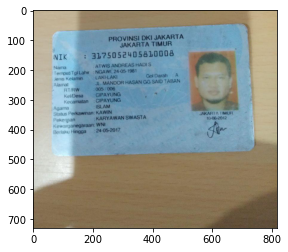

In [111]:
%%time
impath = 'images/ktp_aan/ktp4.jpg'
# impath = 'images/fandi_ktp/ktp2.jpg'
# impath = '/data/idcard/combined/sampled/14907_image.jpg'
pred_data = idcard.predict(impath, low_text=0.1, min_size_percent=5)

In [112]:
pred_data.keys()

dict_keys(['prediction', 'dataframe', 'image', 'segment_image', 'rotated_image', 'images_patch', 'boxes', 'texts', 'score_text', 'score_list', 'score'])

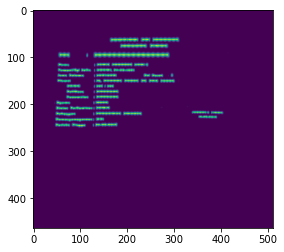

In [113]:
plt.imshow(pred_data['score']);plt.show()

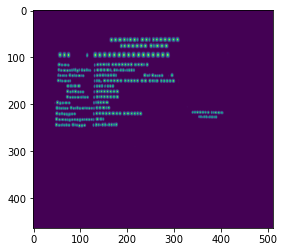

In [114]:
plt.imshow(pred_data['score_text']);plt.show()

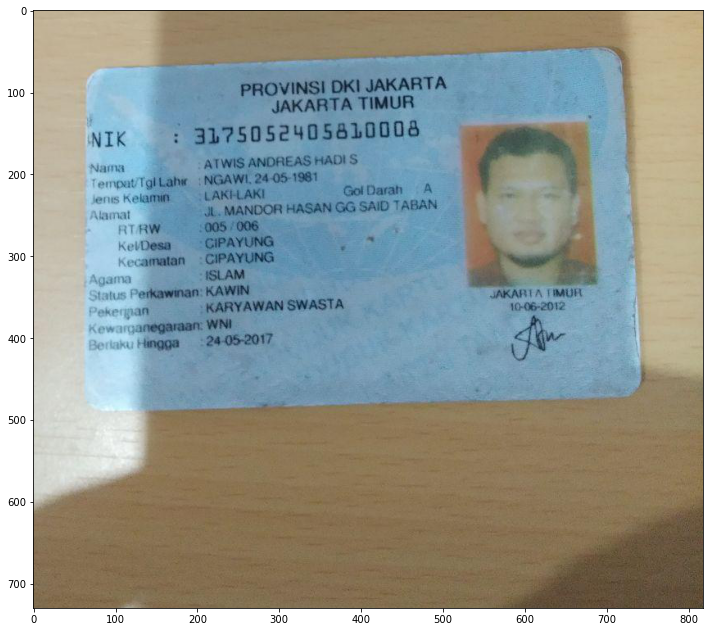

In [115]:
plt.figure(figsize=(12,12))
plt.imshow(pred_data['segment_image']);plt.show()

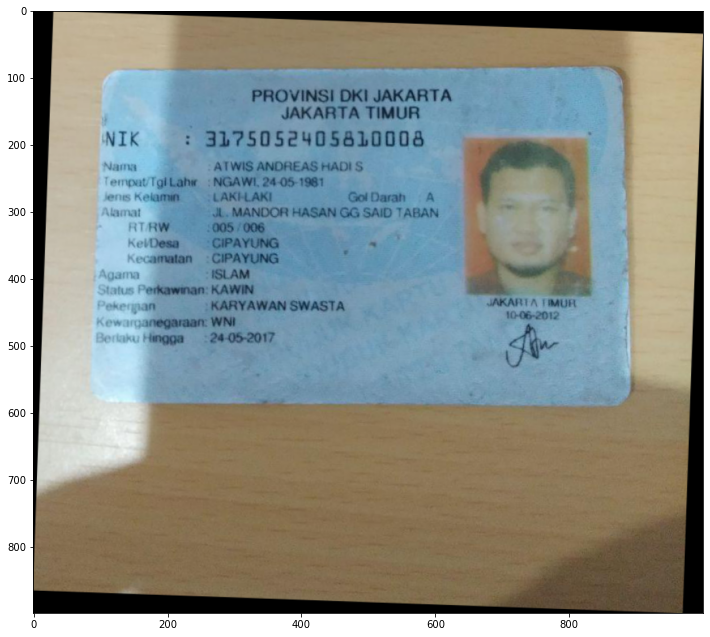

In [116]:
plt.figure(figsize=(12,12))
plt.imshow(pred_data['rotated_image']);plt.show()

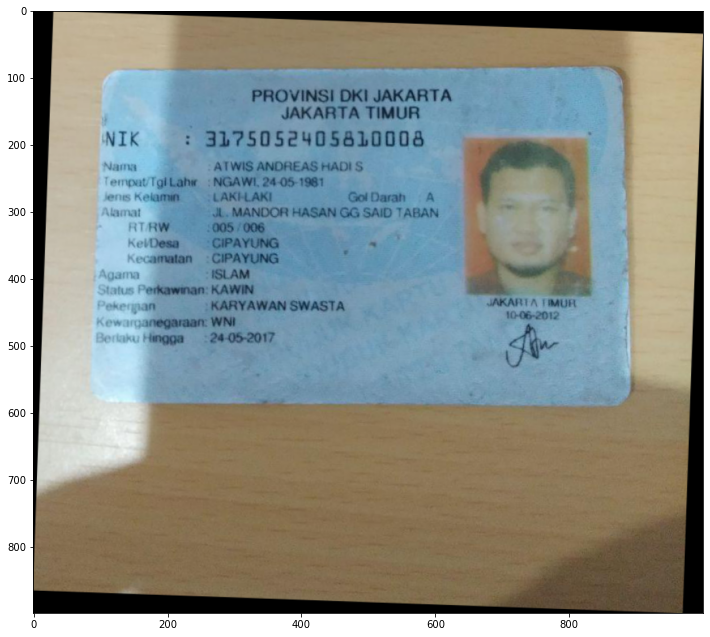

In [117]:
plt.figure(figsize=(12,12))
plt.imshow(pred_data['image']);plt.show()

In [118]:
pred_data['prediction']

{'provinsi': 'PROVINSI DKI JAKARTA',
 'kabupaten': 'JAKARTA TIMUR',
 'nik': '3175052405810008',
 'nama': 'ATWIS ANDREAS HADIS',
 'ttl': 'NGAWI, 24-05-1981',
 'gender': 'LAKI-LAKI',
 'goldar': '',
 'alamat': 'JL. MANDOR, HASAN G6 SAID TABAN, A/1',
 'rtrw': '005 006',
 'kelurahan': 'CIPAYUNG,',
 'kecamatan': 'CIPAYUNG,',
 'agama': 'ISLAM',
 'perkawinan': 'KAWIN',
 'pekerjaan': 'KARYAWAN SWASTA',
 'kewarganegaraan': 'WNI',
 'berlaku': '',
 'sign_place': 'JAKARTA TIMUR',
 'sign_date': '10-06-2012 24-05-2017'}

In [119]:
pred_data['dataframe']

,words,bboxes,tokens,labels,gseq,wseq
0,JAKARTA,"[504.0, 110.0, 630.0, 140.0]",jakarta,L-VAL_PROV,0,0
1,PROVINSI,"[322.0, 112.0, 454.0, 142.0]",provinsi,U-FLD_PROV,1,0
2,DKI,"[454.0, 112.0, 506.0, 140.0]",dki,B-VAL_PROV,2,0
3,JAKARTA,"[365.0, 137.0, 491.0, 165.0]",jakarta,B-VAL_KAB,3,0
4,TIMUR,"[492.0, 137.0, 582.0, 165.0]",timur,L-VAL_KAB,4,0
5,3175052405810008,"[252.0, 171.0, 587.0, 207.0]",317,B-VAL_NIK,5,0
6,3175052405810008,"[252.0, 171.0, 587.0, 207.0]",##50,I-VAL_NIK,5,1
7,3175052405810008,"[252.0, 171.0, 587.0, 207.0]",##52,I-VAL_NIK,5,2
8,3175052405810008,"[252.0, 171.0, 587.0, 207.0]",##40,I-VAL_NIK,5,3
9,3175052405810008,"[252.0, 171.0, 587.0, 207.0]",##58,I-VAL_NIK,5,4


In [120]:
pred_data['texts']

['JAKARTA',
 'PROVINSI',
 'DKI',
 'JAKARTA',
 'TIMUR',
 'NIK',
 '3175052405810008',
 'Nama',
 'ATWIS',
 'ANDREAS',
 'HADIS',
 'Tempat/Tgl',
 'Lahir',
 'NGAWI,',
 '24-05-1981',
 'Gol.',
 'A/1',
 'Jenis',
 'Kelamin',
 'LAKI-LAKI',
 'Darah',
 'Alamat',
 'MANDOR,',
 'HASAN',
 'G6',
 'SAID',
 'TABAN,',
 'JL.',
 'RT/RW',
 '005',
 '006',
 'Kel/Desa',
 'CIPAYUNG,',
 'Kecamatan',
 'CIPAYUNG,',
 'Agama',
 'ISLAM',
 'Status',
 'Perkawinan',
 'KAWIN',
 'JAKARTA',
 'TIMUR',
 'Pekerjaan',
 'KARYAWAN',
 'SWASTA',
 '10-06-2012',
 'Kewarganegaraan',
 'WNI',
 '24-05-2017',
 'Berlaku',
 'Hingga']

In [121]:
impatch = pred_data['images_patch']
texts = pred_data['texts']

In [122]:
#find max
sizes = [im.shape[1] for im in impatch]
max_index, max_value = max(enumerate(sizes), key=lambda x: x[1])

#create percent by max size
percent_size = [int(size/max_value * 100) for size in sizes]


JAKARTA percent_size: 37


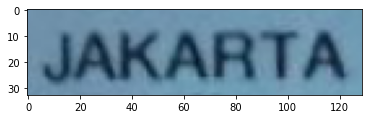

PROVINSI percent_size: 39


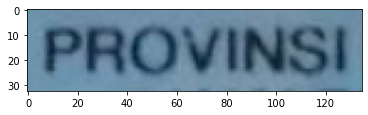

DKI percent_size: 15


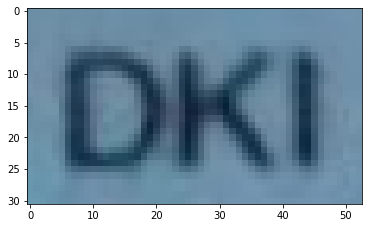

JAKARTA percent_size: 37


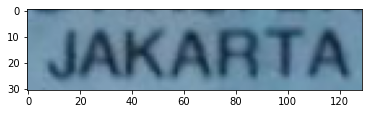

TIMUR percent_size: 27


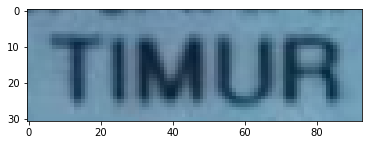

NIK percent_size: 18


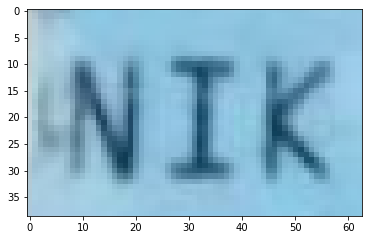

3175052405810008 percent_size: 100


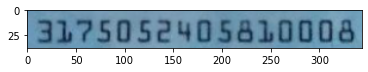

Nama percent_size: 17


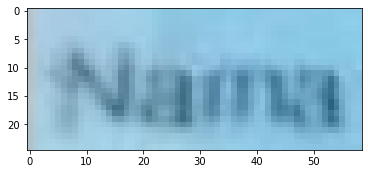

ATWIS percent_size: 19


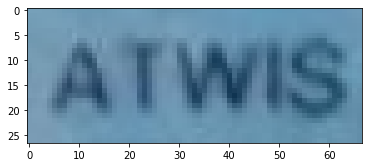

ANDREAS percent_size: 29


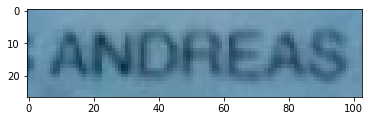

HADIS percent_size: 21


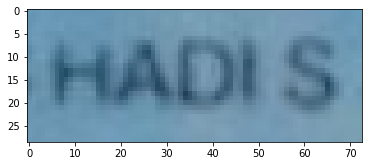

Tempat/Tgl percent_size: 30


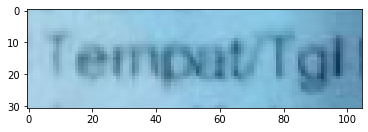

Lahir percent_size: 14


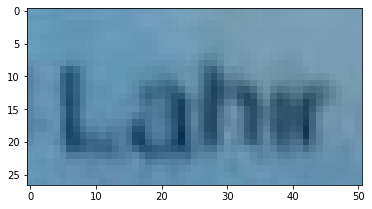

NGAWI, percent_size: 22


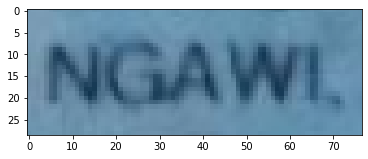

24-05-1981 percent_size: 29


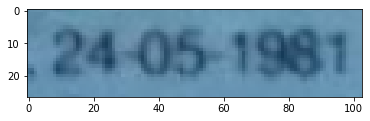

Gol. percent_size: 11


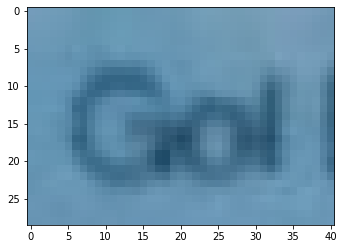

A/1 percent_size: 6


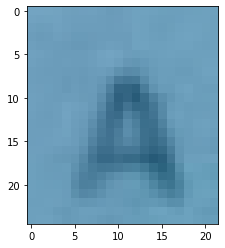

Jenis percent_size: 14


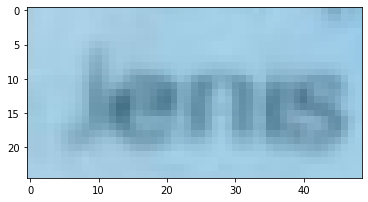

Kelamin percent_size: 21


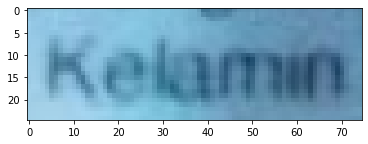

LAKI-LAKI percent_size: 29


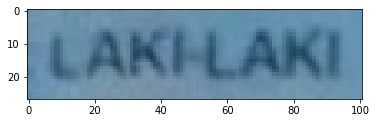

Darah percent_size: 17


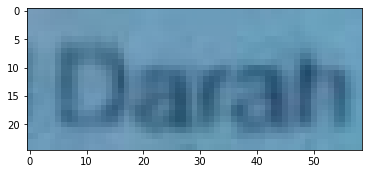

Alamat percent_size: 19


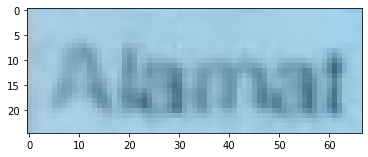

MANDOR, percent_size: 27


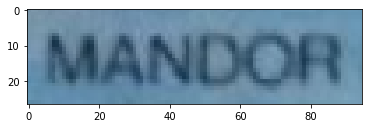

HASAN percent_size: 21


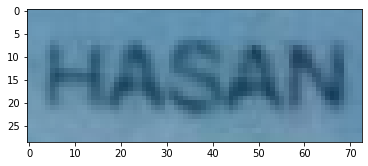

G6 percent_size: 11


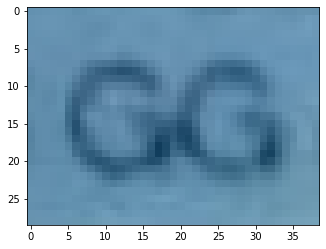

SAID percent_size: 15


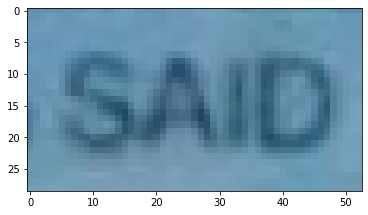

TABAN, percent_size: 21


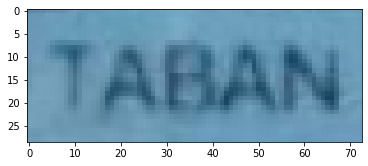

JL. percent_size: 9


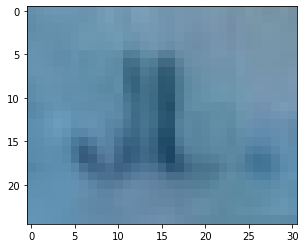

RT/RW percent_size: 20


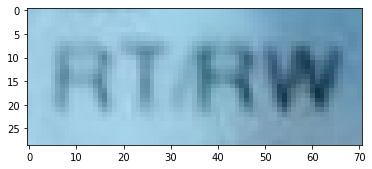

005 percent_size: 11


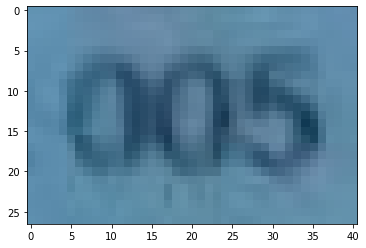

006 percent_size: 11


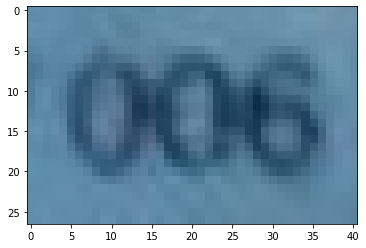

Kel/Desa percent_size: 25


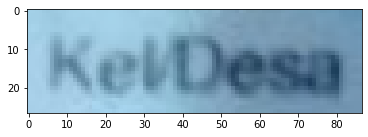

CIPAYUNG, percent_size: 32


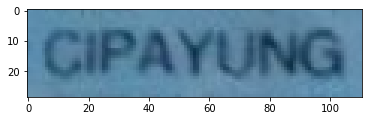

Kecamatan percent_size: 31


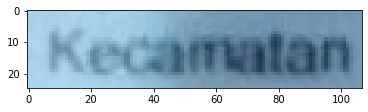

CIPAYUNG, percent_size: 32


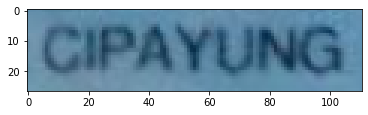

Agama percent_size: 20


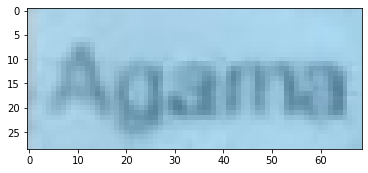

ISLAM percent_size: 19


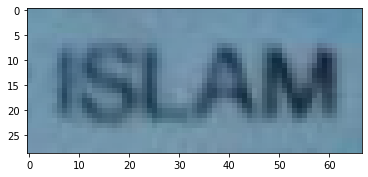

Status percent_size: 18


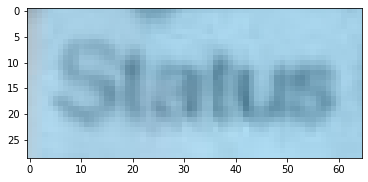

Perkawinan percent_size: 34


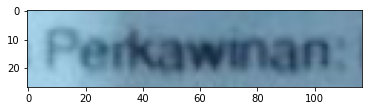

KAWIN percent_size: 21


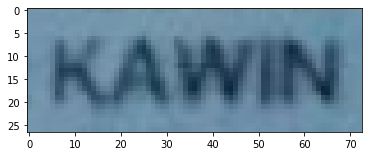

JAKARTA percent_size: 25


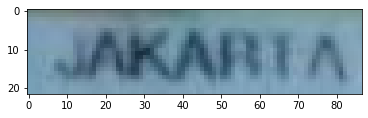

TIMUR percent_size: 17


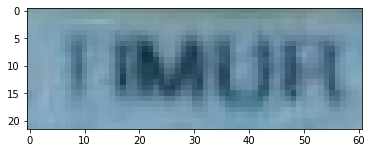

Pekerjaan percent_size: 29


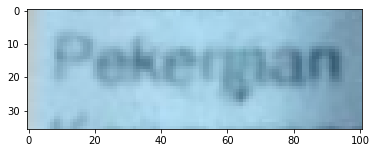

KARYAWAN percent_size: 35


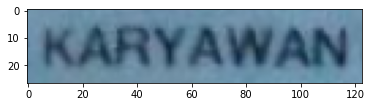

SWASTA percent_size: 27


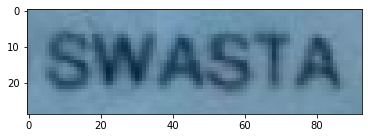

10-06-2012 percent_size: 25


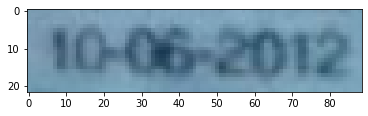

Kewarganegaraan percent_size: 52


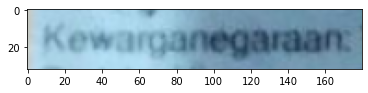

WNI percent_size: 13


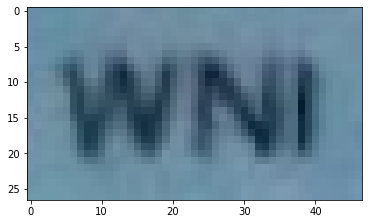

24-05-2017 percent_size: 31


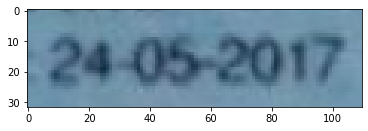

Berlaku percent_size: 21


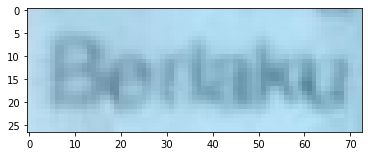

Hingga percent_size: 21


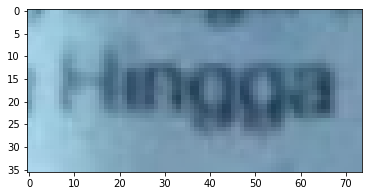

In [123]:
for idx, (patch, txt, pz) in enumerate(zip(impatch, texts, percent_size)):
    print(f'{txt} percent_size: {pz}')    
    plt.imshow(patch);plt.show()
